In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/parrt/dtreeviz/master/data/titanic/titanic.csv")#Titanicデータを読み込む

<Axes: >

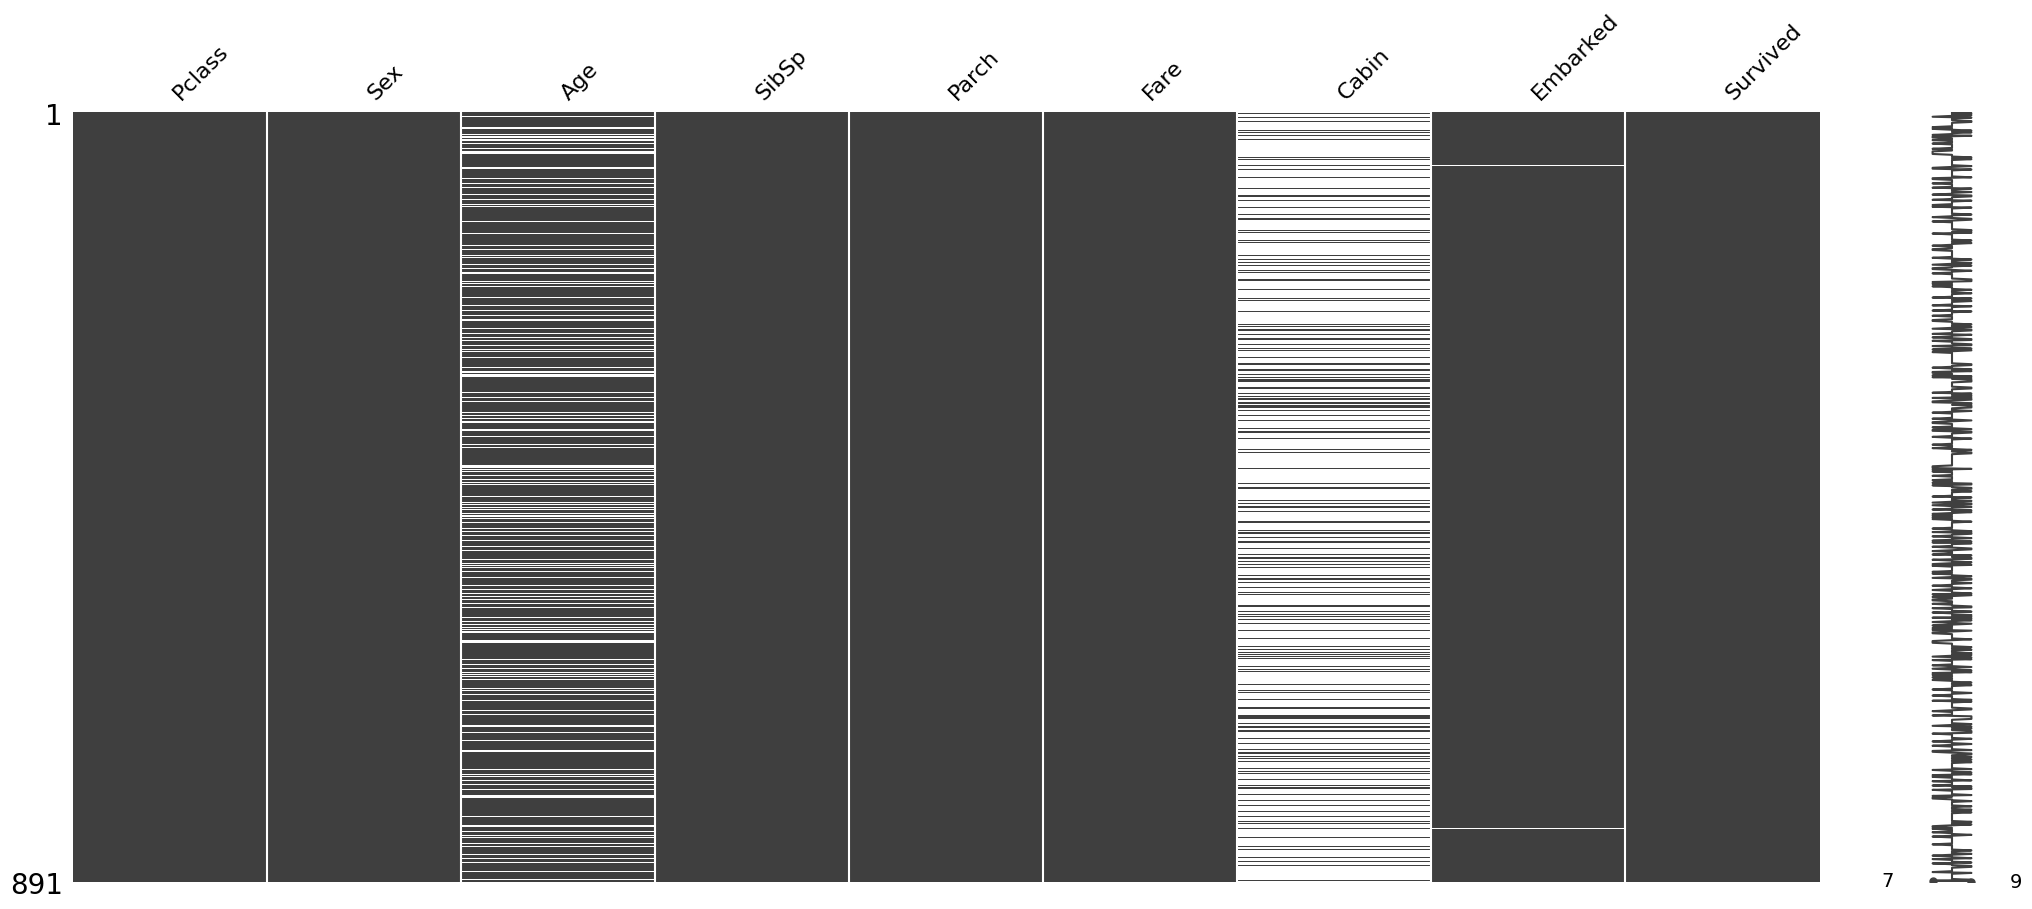

In [2]:
import missingno as msno
msno.matrix(df[['Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Cabin', 'Embarked', 'Survived']])

In [3]:
from sklearn.preprocessing import LabelEncoder

df['Cabin'] = df['Cabin'].apply(lambda row : row[0:1] if row is not np.nan else row)
df['Age'] = df['Age'].apply(lambda row : 0 if row < 1.0 else row)

# for l in ['Embarked', 'Sex', 'Cabin', 'Age']:# Age = NaN は 84になる(max)
#     le = LabelEncoder()
#     encoded = le.fit_transform(df[l].values)
#     decoded = le.inverse_transform(encoded)
#     df[l+'_enc'] = encoded

df["Sex_enc"] = df.Sex.astype("category").cat.codes
df["Cabin_enc"] = df.Cabin.astype("category").cat.codes
df["Embarked_enc"] = df.Embarked.astype("category").cat.codes
df["Age_enc"] = df.Age.astype("category").cat.codes # Age = NaN は −１になる

features = ['Pclass','Sex_enc','SibSp','Parch', 'Fare', 'Cabin_enc', 'Age_enc']
# data, target = df[['Pclass','Sex_enc','Age','SibSp','Parch', 'Fare', 'Cabin_enc', 'Embarked_enc']].to_numpy(), df['Survived'].to_numpy() #データとラベルを分ける
data, target = df[features].to_numpy(), df['Survived'].to_numpy() #データとラベルを分ける

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0) # 学習データとテストデータへ7:3で分割

print(x_train.dtype, x_test.dtype, y_train.dtype, y_test.dtype) #データ型の確認
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) #データ数の確認

float64 float64 int64 int64
(623, 7) (268, 7) (623,) (268,)


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc,Cabin_enc,Embarked_enc,Age_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,-1,2,24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,2,0,47
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,-1,2,30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,2,2,43
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,-1,2,43


In [5]:
df[['Age', 'Age_enc']].sort_values('Age').drop_duplicates()

,Age,Age_enc
78,0.0,0
827,1.0,1
642,2.0,2
348,3.0,3
850,4.0,4
...,...,...
116,70.5,80
493,71.0,81
851,74.0,82
630,80.0,83


In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4) #分類問題のモデルを作成
tree.fit(x_train, y_train) # 学習
y_pred = tree.predict(x_test) # テストデータの予測値

print(tree.get_params())
print(y_pred)
print('学習時スコア：', tree.score(x_train, y_train), '検証スコア', tree.score(x_test, y_test))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
[0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0
 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0]
学習時スコア： 0.8282504012841091 検証スコア 0.7910447761194029


In [7]:
# import graphviz
# from sklearn.tree import export_graphviz

# dot = export_graphviz(tree, filled=True, rounded=True, 
#                       class_names=['dead', 'survived'],
#                       feature_names=['Pclass','Sex_enc','Age','SibSp','Parch', 'Fare', 'Cabin_enc', 'Embarked_enc'],
#                       out_file=None) 

# graph = graphviz.Source(dot) #DOT記法をレンダリング
# graph #グラフを出力

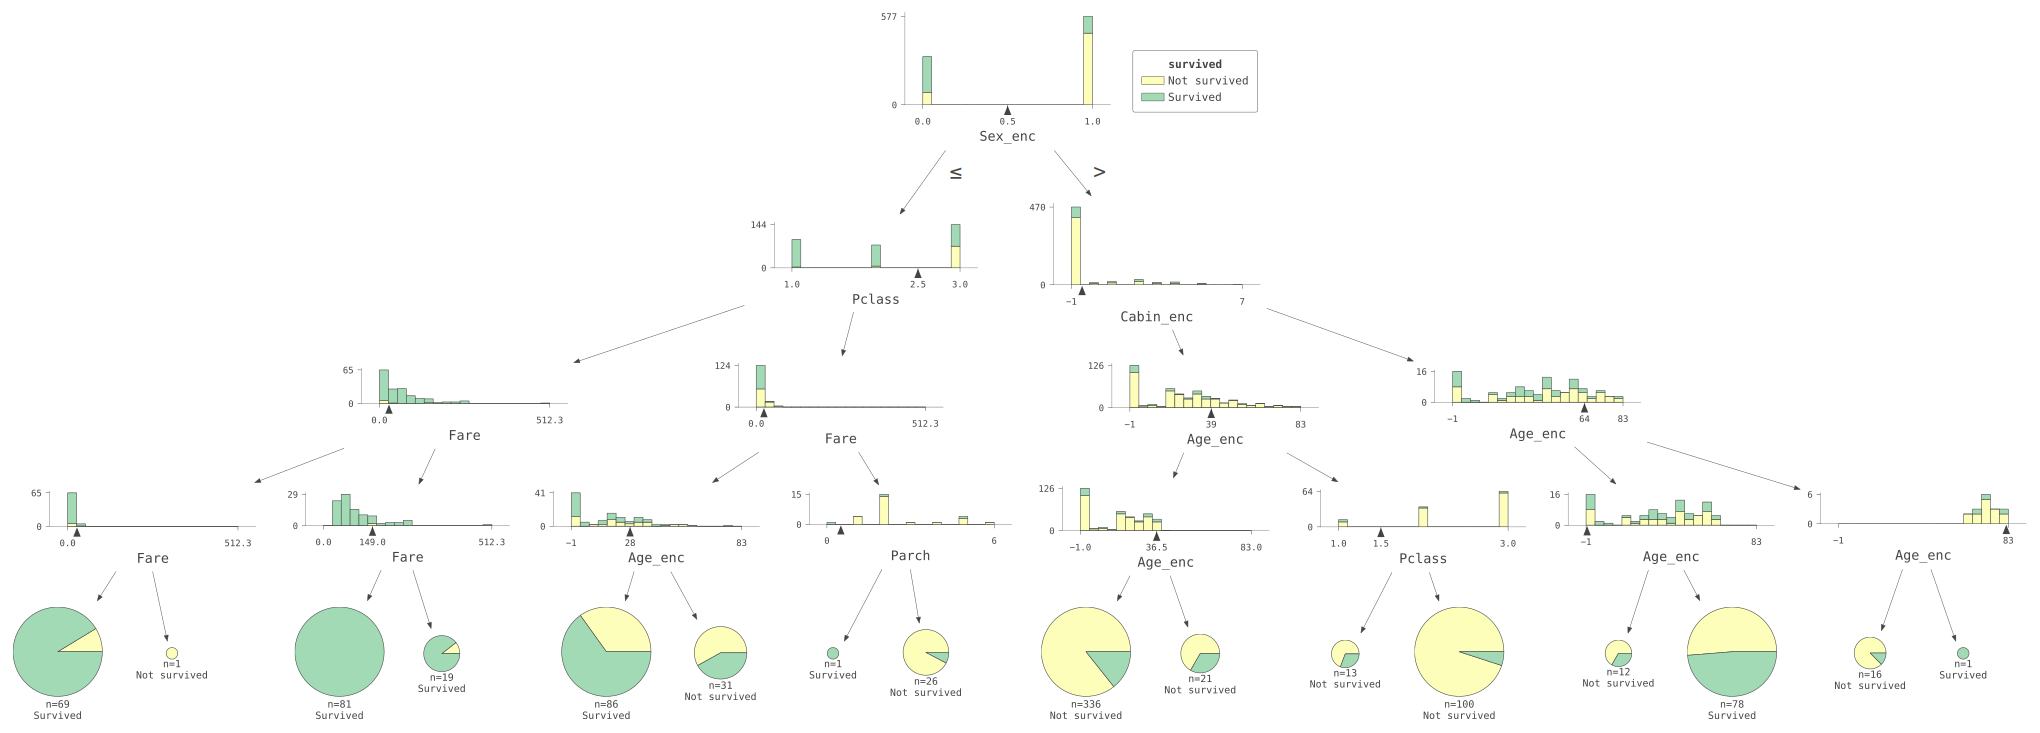

In [8]:
import dtreeviz
viz_model = dtreeviz.model(tree,
                           X_train=df[features].to_numpy(), 
                           y_train=df['Survived'].to_numpy(),
                           feature_names=features,
                           class_names=['Not survived', 'Survived'],
                           target_name='survived')
v = viz_model.view(scale=1.5,fontname="monospace")
v.save("titanic1.svg")
v

In [9]:
df[12:13]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc,Cabin_enc,Embarked_enc,Age_enc
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.05,NaN,S,1,-1,2,21


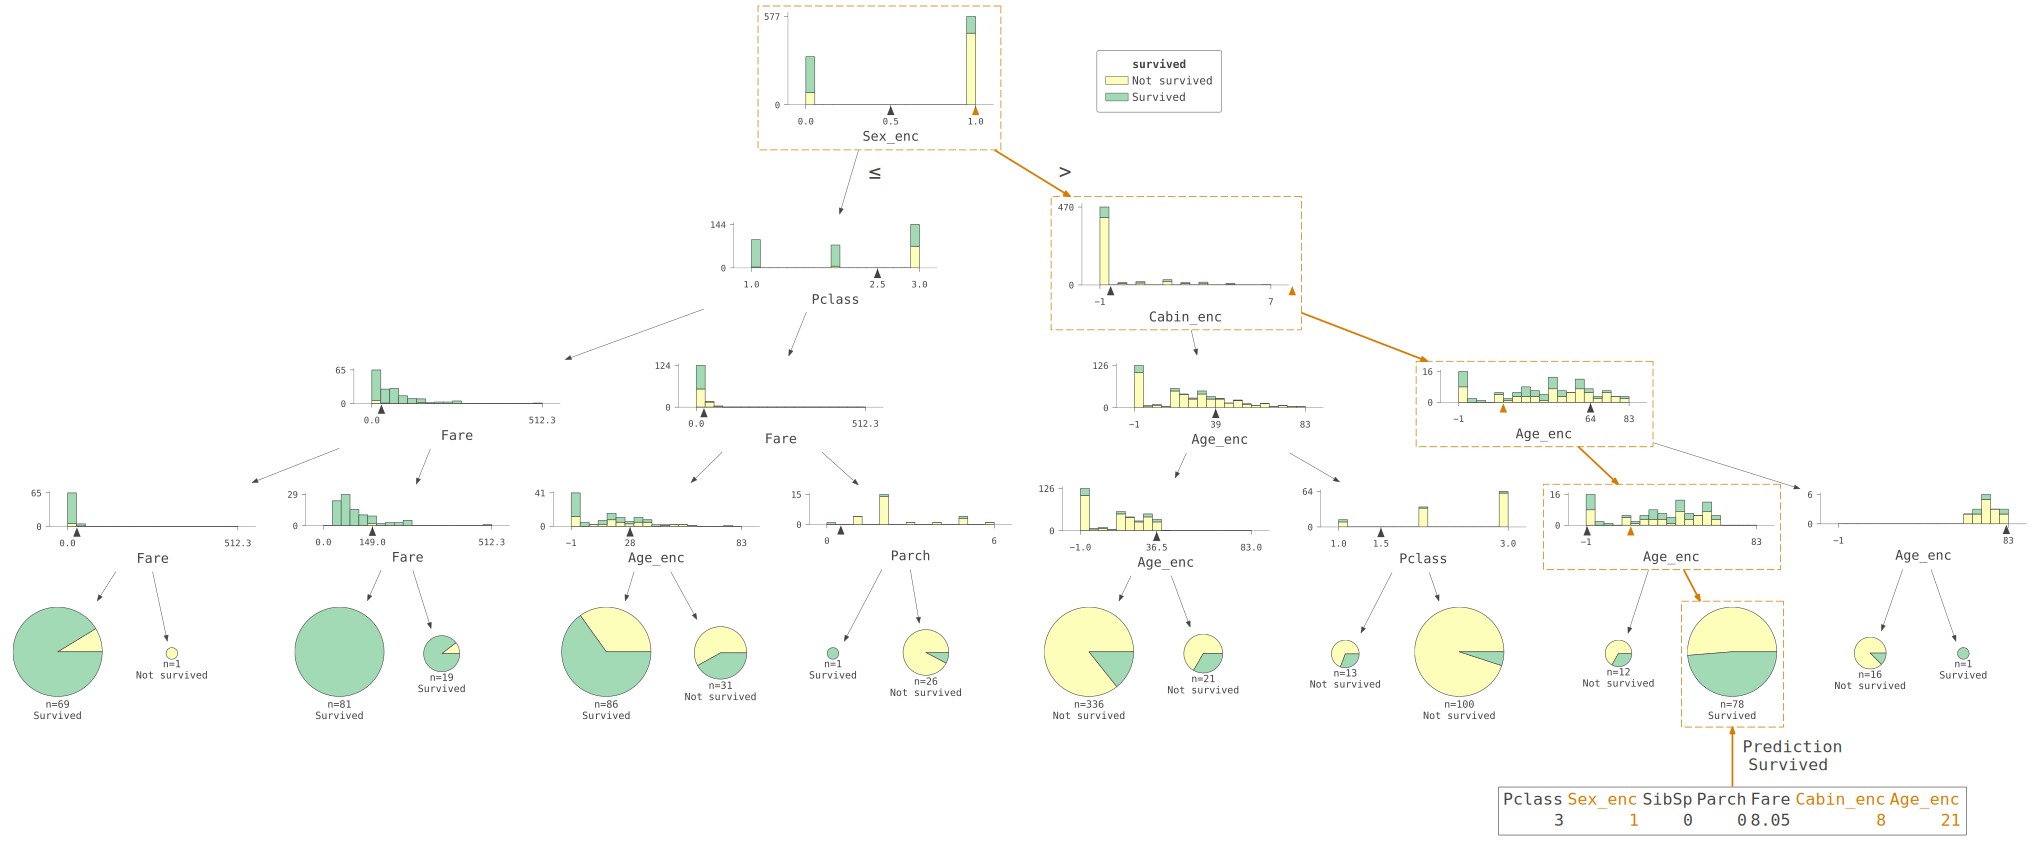

In [10]:
v = viz_model.view(scale=1.5,fontname="monospace",x=[3,1,0,0,8.05,8,21])
v

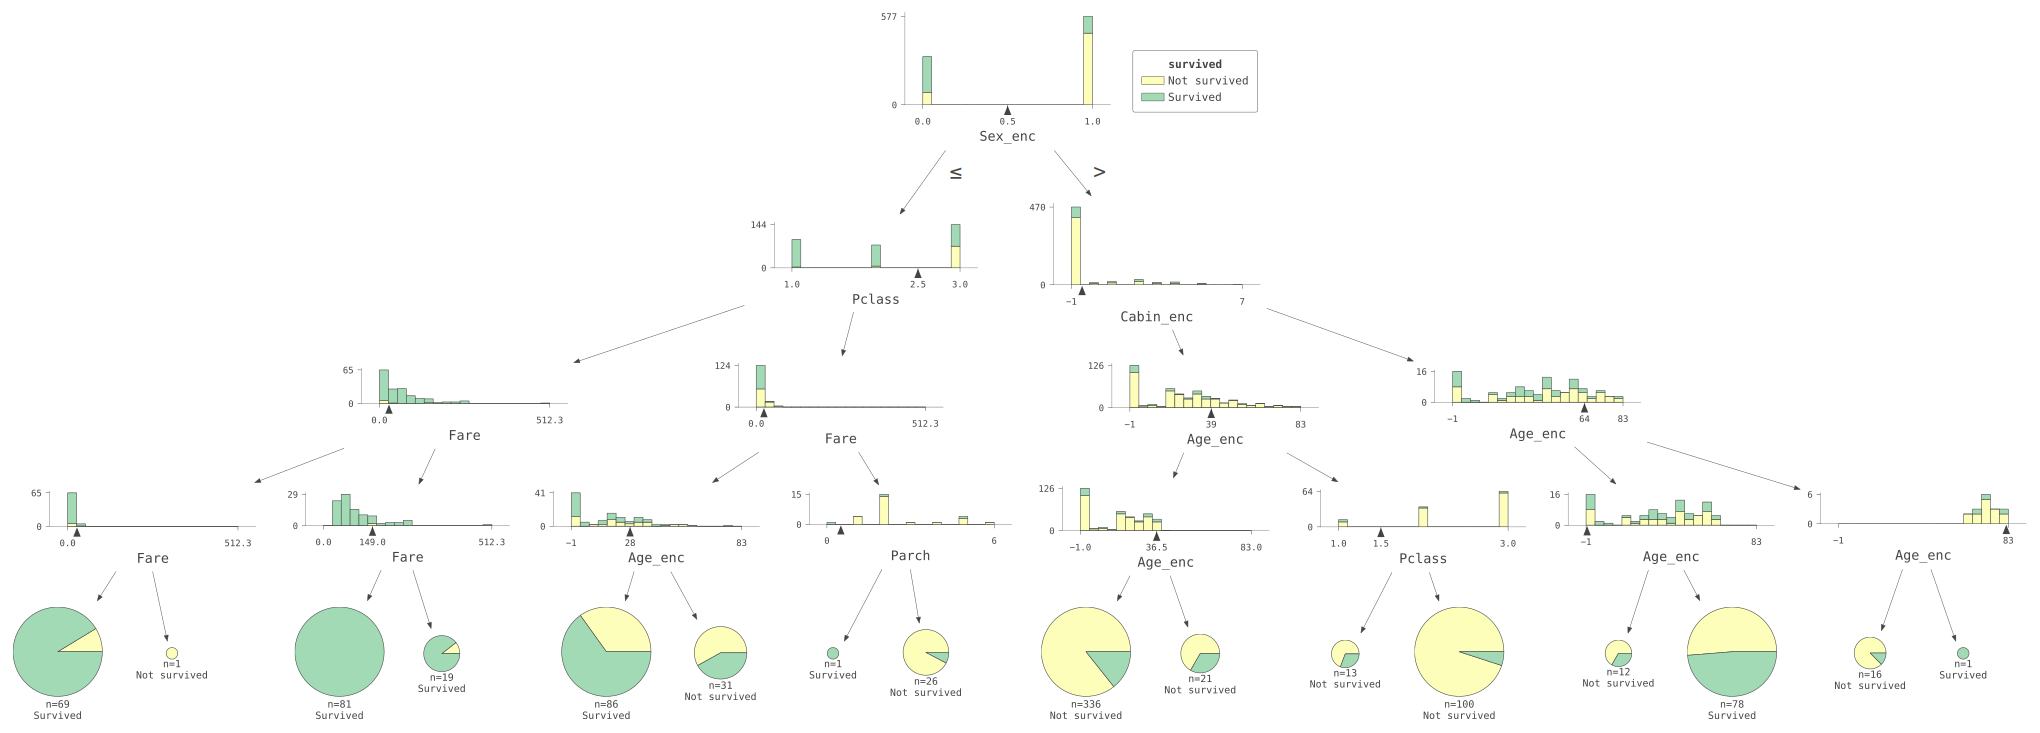

In [11]:
viz_model.view(scale=1.5,fontname="monospace")

# light-GBMでもう一度

In [12]:
import lightgbm as lgb
dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/titanic/titanic.csv"
dataset = pd.read_csv(dataset_url)
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes

features = ["Pclass", "Sex_label", "Embarked_label", "Age", "Cabin_label", "Fare"]
target = "Survived"

X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[target], test_size=0.2, random_state=42)

train_data = lgb.Dataset(data=X_train, label=y_train, feature_name=features, categorical_feature=["Sex_label", "Pclass"])
valid_data = lgb.Dataset(data=X_test, label=y_test, feature_name=features, categorical_feature=["Sex_label", "Pclass"])

lgbm_params = {
    'boosting': 'dart',          # dart (drop out trees) often performs better
    'application': 'binary',     # Binary classification
    'learning_rate': 0.05,       # Learning rate, controls size of a gradient descent step
    'min_data_in_leaf': 2,      # Data set is quite small so reduce this a bit
    'feature_pre_filter': False,
    'feature_fraction': 0.7,     # Proportion of features in each boost, controls overfitting
    'num_leaves': 41,            # Controls size of tree since LGBM uses leaf wise splits
    'drop_rate': 0.15,
    'max_depth':4,
    "seed":1212}

lgbm_model = lgb.train(lgbm_params, train_data, valid_sets=[train_data, valid_data])

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.421084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

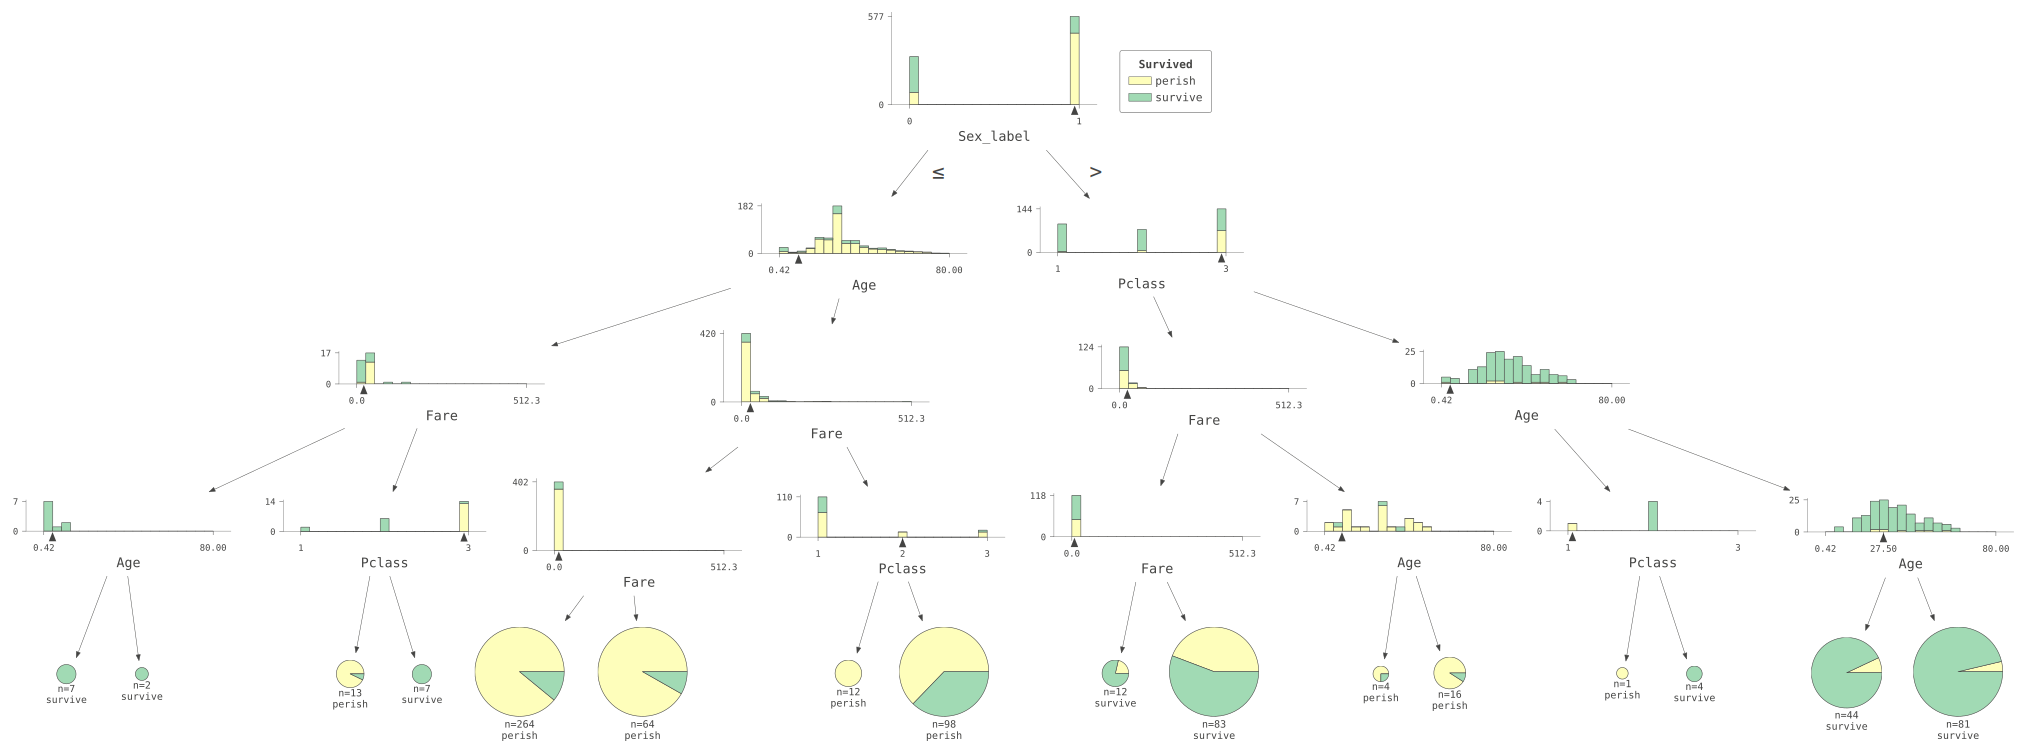

In [13]:
viz_model = dtreeviz.model(lgbm_model, tree_index=99,
                           X_train=dataset[features], y_train=dataset[target],
                           feature_names=features,
                           target_name=target, class_names=["perish", "survive"])
v = viz_model.view(scale=1.5,fontname="monospace")
v.save("titanic2.svg")
v

# 自作の関数でラベルエンコーダーをdecodeする

In [14]:
from dtreeviz.models.shadow_decision_tree import ShadowDecTreeNode
from dtreeviz.trees import _prop_size, _get_num_bins, _format_axes, _draw_wedge, _set_wedge_ticks
import matplotlib.pyplot as plt
import matplotlib

def _my_class_split_viz(node: ShadowDecTreeNode,
                     X_train: np.ndarray,
                     y_train: np.ndarray,
                     colors: dict,
                     node_heights,
                     filename: str,
                     ticks_fontsize: int,
                     label_fontsize: int,
                     fontname: str,
                     precision: int,
                     histtype: ('bar', 'barstacked', 'strip'),
                     X: np.array,
                     highlight_node: bool):
    height_range = (.5, 1.5)
    h = _prop_size(n=node_heights[node.id], counts=node_heights.values(), output_range=height_range)
    figsize = (3.3, h)
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    feature_name = node.feature_name()

    # Get X, y data for all samples associated with this node.
    X_feature = X_train[:, node.feature()]
    X_node_feature, y_train = X_feature[node.samples()], y_train[node.samples()]

    n_classes = node.shadow_tree.nclasses()
    nbins = _get_num_bins(histtype, n_classes)

    # for categorical splits, we need to ensure that each vertical bar will represent only one categorical feature value
    if node.is_categorical_split():
        feature_unique_size = np.unique(X_feature).size
        # keep the bar widths as uniform as possible for all node visualisations
        nbins = nbins if nbins > feature_unique_size else feature_unique_size + 1

    # only for str categorical features which are str type, int categorical features can work fine as numerical ones
    if node.is_categorical_split() and type(X_feature[0]) == str:
        # TODO think if the len() should be from all training[feature] data vs only data from this specific node ?
        overall_feature_range = (0, len(np.unique(X_feature)) - 1)
    else:
        overall_feature_range = (np.min(X_train[:, node.feature()]), np.max(X_train[:, node.feature()]))

    bins = np.linspace(start=overall_feature_range[0], stop=overall_feature_range[1], num=nbins, endpoint=True)
    _format_axes(ax, feature_name, None, colors, fontsize=label_fontsize, fontname=fontname, ticks_fontsize=ticks_fontsize, grid=False, pad_for_wedge=True)

    class_names = node.shadow_tree.class_names
    class_values = node.shadow_tree.classes()
    X_hist = [X_node_feature[y_train == cl] for cl in class_values]

    # for multiclass examples, there could be scenarios where a node won't contain all the class value labels which will
    # generate a matplotlib exception. To solve this, we need to filter only the class values which belong to a node and
    # theirs corresponding colors.
    X_colors = [colors[cl] for i, cl in enumerate(class_values) if len(X_hist[i]) > 0]
    X_hist = [hist for hist in X_hist if len(hist) > 0]

    if histtype == 'strip':
        ax.yaxis.set_visible(False)
        ax.spines['left'].set_visible(False)
        sigma = .013
        mu = .05
        class_step = .08
        dot_w = 20
        ax.set_ylim(0, mu + n_classes * class_step)
        for i, bucket in enumerate(X_hist):
            alpha = colors['scatter_marker_alpha'] if len(bucket) > 10 else 1
            y_noise = np.random.normal(mu + i * class_step, sigma, size=len(bucket))
            ax.scatter(bucket, y_noise, alpha=alpha, marker='o', s=dot_w, c=colors[i],
                       edgecolors=colors['edge'], lw=.3)
    else:
        hist, bins, barcontainers = ax.hist(X_hist,
                                            color=X_colors,
                                            align='mid',
                                            histtype=histtype,
                                            bins=bins,
                                            label=class_names)

        # Alter appearance of each bar
        if isinstance(barcontainers[0], matplotlib.container.BarContainer):
            for patch in barcontainers:
                for rect in patch.patches:
                    rect.set_linewidth(.5)
                    rect.set_edgecolor(colors['rect_edge'])
            ax.set_yticks([0, max([max(h) for h in hist])])
        elif isinstance(barcontainers[0], matplotlib.patches.Rectangle):
            # In case a node will contains samples from only one class.
            for rect in barcontainers.patches:
                rect.set_linewidth(.5)
                rect.set_edgecolor(colors['rect_edge'])
            ax.set_yticks([0, max(hist)])



    # set an empty space at the beginning and the end of the node visualisation for better clarity
    bin_length = bins[1] - bins[0]
    overall_feature_range_wide = (bins[0] - 2 * bin_length, bins[len(bins) - 1] + 2 * bin_length)

    ax.set_xlim(*overall_feature_range_wide)

    if node.is_categorical_split() and type(X_feature[0]) == str:
        # run draw to refresh the figure to get the xticklabels
        plt.draw()
        node_split = list(map(str, node.split()))
        # get the label text and its position from the figure
        label_index = dict([(label.get_text(), label.get_position()[0]) for label in ax.get_xticklabels()])
        # get tick positions, ignoring "out of dictionary" symbol added by tensorflow trees for "unknown symbol"
        wedge_ticks_position = [label_index[split] for split in node_split if split in label_index]
        wedge_ticks = _draw_wedge(ax, x=wedge_ticks_position, node=node, color=colors['wedge'], is_classifier=True, h=h,
                                  height_range=height_range, bins=bins)
        if highlight_node:
            highlight_value = [label_index[X[node.feature()]]]
            _ = _draw_wedge(ax, x=highlight_value, node=node, color=colors['highlight'], is_classifier=True, h=h,
                            height_range=height_range, bins=bins)
    else:
        wedge_ticks = _draw_wedge(ax, x=node.split(), node=node, color=colors['wedge'], is_classifier=True, h=h, height_range=height_range, bins=bins)
        if highlight_node:
            _ = _draw_wedge(ax, x=X[node.feature()], node=node, color=colors['highlight'], is_classifier=True, h=h, height_range=height_range, bins=bins)
    ###　ここから変更部部位
    # if feature_name == "Sex_label":
    #     overall_feature_range=('female', 'male')
    #     wedge_ticks=''
        
    _set_wedge_ticks(ax, ax_ticks=list(overall_feature_range), wedge_ticks=wedge_ticks)
    # print(overall_feature_range)
    # print(len(ax.xaxis.get_ticklabels()))
    if feature_name == "Sex_label":
        ax.set_xticklabels(['female','male'], color='red', fontsize='large')
    elif feature_name == "Pclass" and len(ax.xaxis.get_ticklabels())==3:
        ax.set_xticklabels(['upper','middle', 'lower'], color='red', fontsize='large')
    elif feature_name == "Pclass" and len(ax.xaxis.get_ticklabels())==2:
        ax.set_xticklabels(['upper','lower'], color='red', fontsize='large')

    if filename is not None:
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)
        plt.close()

dtreeviz.trees._class_split_viz = _my_class_split_viz

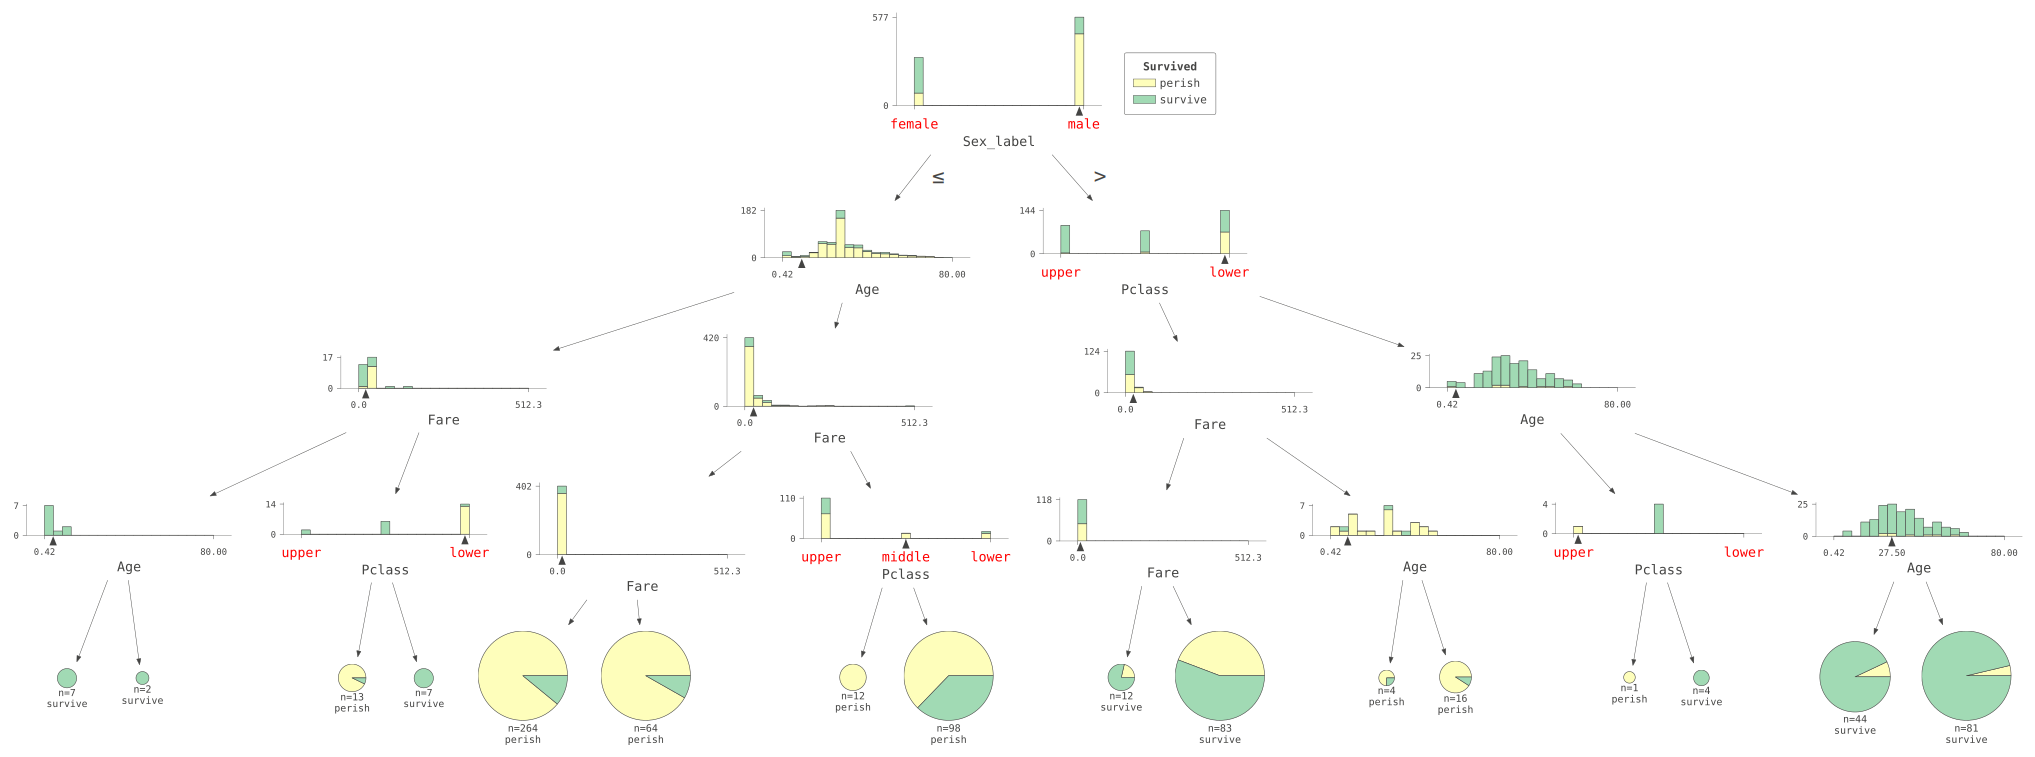

In [15]:
viz_model = dtreeviz.model(lgbm_model, tree_index=99,
                           X_train=dataset[features], y_train=dataset[target],
                           feature_names=features,
                           target_name=target, class_names=["perish", "survive"])
v = viz_model.view(scale=1.5,fontname="monospace")
v.save("titanic3.svg")
v

# 自作の関数で最後のリーフごとに追加のsvg描画を行う

In [6]:
from dtreeviz.trees import _regr_leaf_viz, adjust_colors
from dtreeviz.utils import _format_axes
import matplotlib.pyplot as plt

def _my_regr_leaf_viz(df,
                   y: (pd.Series, np.ndarray),
                   target_name: str,
                   filename: str,
                   label_fontsize: int,
                   ticks_fontsize: int,
                   fontname: str,
                   colors):
    colors = adjust_colors(colors)

    # samples = node.samples()
    samples = len(df)
    # y = y[samples]

    figsize = (.75, .8)

    fig, ax = plt.subplots(1, 1, figsize=figsize)
    # m = node.prediction()

    _format_axes(ax, None, None, colors, fontsize=label_fontsize, fontname=fontname, ticks_fontsize=ticks_fontsize, grid=False)
    # ax.set_ylim(y_range)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])

    ticklabelpad = plt.rcParams['xtick.major.pad']
    ax.annotate(f"{target_name}\nn={len(y)}",
                xy=(.5, 0), xytext=(.5, -.5 * ticklabelpad), ha='center', va='top',
                xycoords='axes fraction', textcoords='offset points',
                fontsize=label_fontsize, fontname=fontname, color=colors['axis_label'])

    mu = .5
    sigma = .08
    X = np.random.normal(mu, sigma, size=len(y)) # !!!適当にX方向に広げてる
    ax.set_xlim(0, 1)
    alpha = colors['scatter_marker_alpha']  # was .25

    ax.scatter(X, y, s=5, c=colors['scatter_marker'], alpha=alpha, lw=.3)
    # ax.plot([0, len(node.samples())], [m, m], '--', color=colors['split_line'], linewidth=1) # 平均の点線は不要
    
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)
        plt.close()

dtreeviz.trees._regr_leaf_viz = _my_regr_leaf_viz

In [7]:
from dtreeviz.trees import _draw_piechart, adjust_colors
from dtreeviz.models.shadow_decision_tree import ShadowDecTreeNode
from typing import List
def _my_class_leaf_viz(node: ShadowDecTreeNode,
                    colors: List[str],
                    filename: str,
                    graph_colors,
                    fontname,
                    leaftype):
    graph_colors = adjust_colors(graph_colors)

    minsize = .15
    maxsize = 1.3
    slope = 0.02
    nsamples = node.nsamples()
    size = nsamples * slope + minsize
    size = min(size, maxsize)

    # we visually need n=1 and n=9 to appear different but diff between 300 and 400 is no big deal
    counts = node.class_counts()
    prediction = node.prediction_name()

    # when using another dataset than the training dataset, some leaves could have 0 samples.
    # Trying to make a pie chart will raise some deprecation
    if sum(counts) == 0:
        return
    if leaftype == 'pie':
        _draw_piechart(counts, size=size, colors=colors, filename=filename, label=f"n={nsamples}\n{prediction}\nleaf#{node.id}",
                      graph_colors=graph_colors, fontname=fontname)
        _my_regr_leaf_viz(df=pd.DataFrame(x_train)[0:10],y=pd.DataFrame(x_train).iloc[0:10, 0:1],target_name='AI_score',
                      filename=filename.split('.')[0]+'_score.svg', label_fontsize=12, ticks_fontsize=8, fontname=fontname, colors=graph_colors)
    elif leaftype == 'barh':
        _draw_barh_chart(counts, size=size, colors=colors, filename=filename, label=f"n={nsamples}\n{prediction}",
                      graph_colors=graph_colors, fontname=fontname)
    else:
        raise ValueError(f'Undefined leaftype = {leaftype}')

dtreeviz.trees._class_leaf_viz = _my_class_leaf_viz

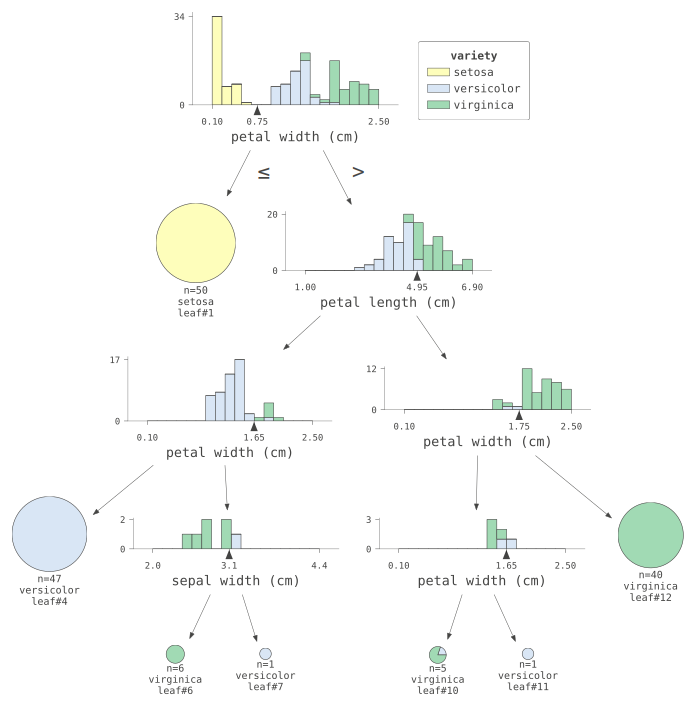

In [8]:
# 変化は少ない（リーフ番号を表示しただけ）が、　_score.svgが作られている
viz_model = dtreeviz.model(tree,
                               X_train=iris.data, y_train=iris.target,
                               feature_names=iris.feature_names,
                               class_names=[str(i) for i in iris.target_names],
                               target_name='variety')
v = viz_model.view(scale=1.5, fontname="monospace")
v.save("test3.svg")
v

# .dotファイルを編集し、追加の描画を図に挿入する

In [9]:
import re

def edit_dot_file(input_path, output_path):
    # Read the contents of the input .dot file
    with open(input_path, 'r') as file:
        content = file.read()
    
    # Define the regex pattern to match the target block
    pattern = re.compile(r'(<tr>\s*<td><img src="/tmp/leaf\d+_\d+\.svg"/></td>\s*</tr>)')
    
    # Define the replacement function
    def replacement(match):
        original_block = match.group(1)
        new_block = original_block + '\n                <tr>\n                        <td><img src="/tmp/leaf{}_{}_score.svg"/></td>\n                </tr>'.format(*re.findall(r'leaf(\d+)_(\d+)', original_block)[0])
        return new_block
    
    # Replace the matched blocks with the modified content
    new_content = re.sub(pattern, replacement, content)
    
    # Write the new content to the output .dot file
    with open(output_path, 'w') as file:
        file.write(new_content)

# Example usage
edit_dot_file('/workspace/dash_or_streamlit/test3', '/workspace/dash_or_streamlit/test3-score')

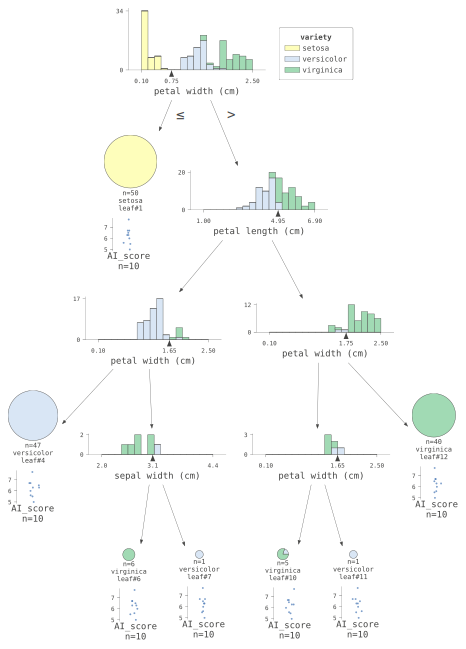

In [11]:
from dtreeviz.utils import DTreeVizRender
with open('/workspace/dash_or_streamlit/test3-score', 'r') as file:
        content = file.read()
vi =DTreeVizRender(content, 1.0)
vi

In [15]:
vi.save('test3-score.svg')

# 単純に並べたい場合は簡易な.dotファイルを作成する

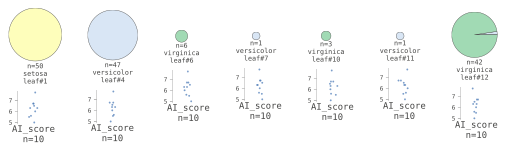

In [12]:
from dtreeviz.utils import DTreeVizRender
dot_score = f"""
digraph G {{
    splines=line;
    
    leaf1 [margin="0" shape=box penwidth="0" color="#444443" label=<<table border="0" CELLBORDER="0">
                
                <tr>
                        <td><img src="/tmp/leaf1_6553.svg"/></td>
                </tr>
                <tr>
                        <td><img src="/tmp/leaf1_6553_score.svg"/></td>
                </tr>
                </table>>]
	leaf4 [margin="0" shape=box penwidth="0" color="#444443" label=<<table border="0" CELLBORDER="0">
                
                <tr>
                        <td><img src="/tmp/leaf4_6553.svg"/></td>
                </tr>
                <tr>
                        <td><img src="/tmp/leaf4_6553_score.svg"/></td>
                </tr>
                </table>>]
	leaf6 [margin="0" shape=box penwidth="0" color="#444443" label=<<table border="0" CELLBORDER="0">
                
                <tr>
                        <td><img src="/tmp/leaf6_6553.svg"/></td>
                </tr>
                <tr>
                        <td><img src="/tmp/leaf6_6553_score.svg"/></td>
                </tr>
                </table>>]
	leaf7 [margin="0" shape=box penwidth="0" color="#444443" label=<<table border="0" CELLBORDER="0">
                
                <tr>
                        <td><img src="/tmp/leaf7_6553.svg"/></td>
                </tr>
                <tr>
                        <td><img src="/tmp/leaf7_6553_score.svg"/></td>
                </tr>
                </table>>]
	leaf10 [margin="0" shape=box penwidth="0" color="#444443" label=<<table border="0" CELLBORDER="0">
                
                <tr>
                        <td><img src="/tmp/leaf10_6553.svg"/></td>
                </tr>
                <tr>
                        <td><img src="/tmp/leaf10_6553_score.svg"/></td>
                </tr>
                </table>>]
	leaf11 [margin="0" shape=box penwidth="0" color="#444443" label=<<table border="0" CELLBORDER="0">
                
                <tr>
                        <td><img src="/tmp/leaf11_6553.svg"/></td>
                </tr>
                <tr>
                        <td><img src="/tmp/leaf11_6553_score.svg"/></td>
                </tr>
                </table>>]
	leaf12 [margin="0" shape=box penwidth="0" color="#444443" label=<<table border="0" CELLBORDER="0">
                
                <tr>
                        <td><img src="/tmp/leaf12_6553.svg"/></td>
                </tr>
                <tr>
                        <td><img src="/tmp/leaf12_6553_score.svg"/></td>
                </tr>
                </table>>]
}}
    """
DTreeVizRender(dot_score, 1.0)

In [ ]:
from dtreeviz.trees import _draw_piechart, adjust_colors
import matplotlib.pyplot as plt
def _my_draw_piechart(counts, size, colors, filename, label, fontname, graph_colors):
    graph_colors = adjust_colors(graph_colors)
    n_nonzero = np.count_nonzero(counts)

    if n_nonzero != 0:
        i = np.nonzero(counts)[0][0]
        if n_nonzero == 1:
            counts = [counts[i]]
            colors = [colors[i]]

    tweak = size * .01
    fig, ax = plt.subplots(1, 1, figsize=(size, size))
    ax.axis('equal')
    ax.set_xlim(0, size - 10 * tweak)
    ax.set_ylim(0, size - 10 * tweak)
    # frame=True needed for some reason to fit pie properly (ugh)
    # had to tweak the crap out of this to get tight box around piechart :(
    wedges, _ = ax.pie(counts, center=(size / 2 - 6 * tweak, size / 2 - 6 * tweak), radius=size / 2, colors=colors,
                       shadow=False, frame=True)
    for w in wedges:
        w.set_linewidth(.5)
        w.set_edgecolor(graph_colors['pie'])

    ax.axis('off')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    if label is not None:
        ax.text(size / 2 - 6 * tweak, -10 * tweak, label,
                horizontalalignment='center',
                verticalalignment='top',
                fontsize=9, color=graph_colors['text'], fontname=fontname)

    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()
dtreeviz.trees._draw_piechart = _my_draw_piechart

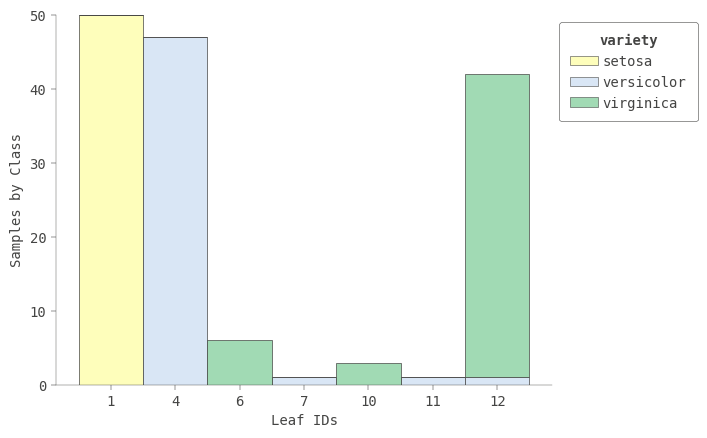

In [7]:
viz_model.ctree_leaf_distributions(fontname="monospace")

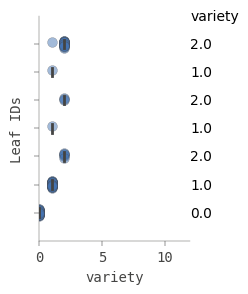

In [8]:
viz_model.rtree_leaf_distributions(fontname="monospace")

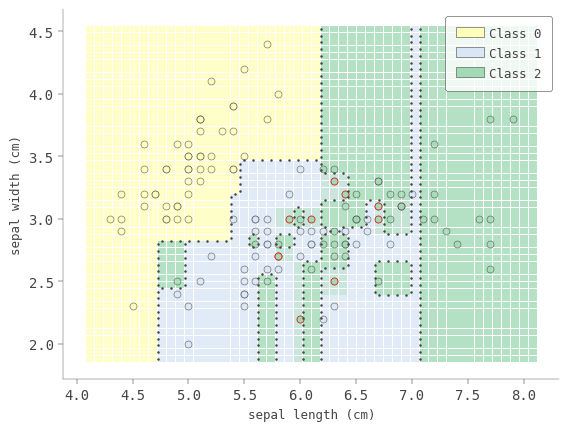

In [38]:
# Xが1または2列（特徴量の数）である必要あり
tree = DecisionTreeClassifier() #分類問題のモデルを作成
tree.fit(iris.data[:, 0:2], iris.target)
dtreeviz.decision_boundaries(tree, X=iris.data[:, 0:2], y=iris.target, fontname="monospace",
       feature_names=iris.feature_names[0:2])

In [18]:
v.svg()

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink" width="843.0" height="795.0" viewBox="0.0 0.0 843.0 795.0">\n<g id="graph0" class="graph" transform="scale(1.5 1.5) rotate(0) translate(4 526)">\n<title>G</title>\n<polygon fill="white" stroke="transparent" points="-4,4 -4,-526 558,-526 558,4 -4,4" />\n<g id="clust7" class="cluster">\n<title>cluster_legend</title>\n</g>\n<g id="clust8" class="cluster">\n<title>cluster_instance</title>\n</g>\n\n<g id="node1" class="node">\n<title>node5</title>\n<polygon fill="none" stroke="#d67c03" stroke-width="0.5" stroke-dasharray="5,2" points="321.5,-197 166.5,-197 166.5,-141 321.5,-141 321.5,-197" />\n<svg width="147px" height="48px" viewBox="0 0 195.95625 64.423125" version="1.1" preserveAspectRatio="xMinYMin meet" x="171" y="-193">\n <metadata>\n  <rdf:RDF>\n   <ns2:Work>\n